In [2]:
import gzip
import os
from Bio import SeqIO, Entrez
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

Entrez.email = input("enter email")

In [5]:
#unzip each gz file in the refseq directory
num = 0
with gzip.open('../data/lineage/ncbi_lineages_2022-12-25.csv.gz', 'rb') as f_in:
    with open('../data/lineage/lineages.csv', 'wb') as f_out:
        f_out.write(f_in.read())
        # num+=1

# print(f'Unzipped {num} files')

In [6]:
lineages = pd.read_csv('../data/lineage/lineages.csv')
print(lineages.head())

/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/1973181399.py:1: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,28,30,31,32,33,35,36,38,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  lineages = pd.read_csv('../data/lineage/lineages.csv')


   tax_id superkingdom          phylum                class             order  \
0       1          NaN             NaN                  NaN               NaN   
1       2     Bacteria             NaN                  NaN               NaN   
2       6     Bacteria  Proteobacteria  Alphaproteobacteria  Hyphomicrobiales   
3       7     Bacteria  Proteobacteria  Alphaproteobacteria  Hyphomicrobiales   
4       9     Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales   

              family         genus                   species biotype clade  \
0                NaN           NaN                       NaN     NaN   NaN   
1                NaN           NaN                       NaN     NaN   NaN   
2  Xanthobacteraceae  Azorhizobium                       NaN     NaN   NaN   
3  Xanthobacteraceae  Azorhizobium  Azorhizobium caulinodans     NaN   NaN   
4        Erwiniaceae      Buchnera       Buchnera aphidicola     NaN   NaN   

   ... subphylum subsection subspecies subtr

In [13]:
acctotax = pd.read_csv('../data/acctotax.csv', sep='\t')
print(acctotax.head())

  accession accession.version  taxid        gi
0    A12106            A12106      0    489462
1    A12371            A12371      0    640579
2    A12541            A12541      0    489533
3    A12543            A12543      0    489535
4    A13660          A13660.1  32630  27764020


In [16]:
df = pd.read_csv('../data/dataset1/human_infecting_virus', delimiter='\t', header=None)
df[['ID', 'DNA Sequence']] = df[0].str.split(expand=True)
df = df.drop(0, axis=1)
df['isZoonotic'] = 1


df2 = pd.read_csv('../data/dataset1/Other_viruses', delimiter='\t', header=None)
df2[['ID', 'DNA Sequence']] = df2[0].str.split(expand=True)
df2 = df2.drop(0, axis=1)
df2['isZoonotic'] = 0

dfother = pd.DataFrame()
it = len(df)

nardus = pd.read_csv('../data/nardus_sequences.csv')
nardus.reset_index(drop=True, inplace=True)


temp = pd.DataFrame()
for i in range(len(nardus)):
    val = nardus.iloc[i]
    len(acctotax[acctotax['accession']==val['ID']]) != 0 and print(acctotax[acctotax['accession']==val['ID']])
    temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)

print(temp)

df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

mergedDf = pd.concat([df, df2, nardus], axis=0, ignore_index=True)
mergedDf.reset_index(drop=True, inplace=True)
mergedDf = mergedDf.drop_duplicates(subset=['ID'])

Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


/var/folders/vf/6r913rfx607_3y64x5l2zw4r0000gn/T/ipykernel_27160/2688147201.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append({'ID': acctotax[acctotax['accession']==val['ID']], 'DNA Sequence': val['DNA Sequence'], 'isZoonotic': val['isZoonotic']}, ignore_index=True)


Empty DataFrame
Columns: [accession, accession.version, taxid, gi]
Index: []


KeyboardInterrupt: 

In [14]:
print(mergedDf.tail())

NameError: name 'mergedDf' is not defined

{'>10000bp': 5169, '10000bp': 3351, '3000bp': 1630, '5000bp': 1004, '1000bp': 122}
['>10000bp', '10000bp', '3000bp', '5000bp', '1000bp']


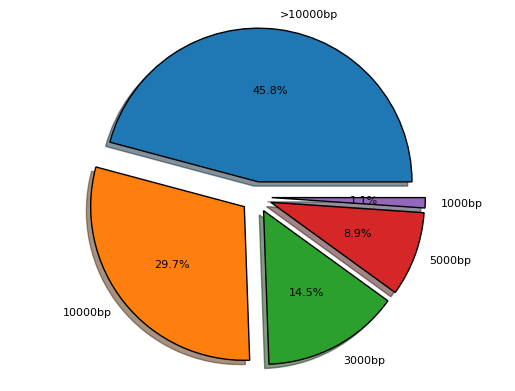

In [45]:
l = [0]*5
pieces = [1000,3000,5000,10000]
di = OrderedDict({})
for i in mergedDf['DNA Sequence']:
    found = False
    for piece in pieces:
        if len(i) < piece: 
            di[str(piece)+"bp"]=di.get(str(piece)+"bp",0)+1
            found = True
            break
    if not found:
        di[">10000bp"]=di.get(">10000bp",0)+1

di = dict(sorted(di.items(), key=lambda item: item[1], reverse=True))
print(di)
keys = list(di.keys())
vals = list(di.values())
print(keys)

# move 500bp to the beginning
# tempkey, tempval = keys[-1], vals[-1]
# keys = keys[:len(keys)-1]
# vals = vals[:len(vals)-1]
# keys.insert(0, tempkey)
# vals.insert(0, tempval)

# print(keys)
# print(vals)



explode = (0.1, 0.1, 0.1, 0.1, 0.1)
def aa(val):
    return str(round(val, 1)) + '%' if round(val, 1) > 0 else ''
plt.pie(vals, labels=keys,
    shadow=True, autopct=aa, explode=explode,
    wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True}, 
        textprops={'fontsize': 8})
plt.axis('equal')
plt.show()

In [54]:
# print(lineages.loc[lineages['tax_id']==37121])
# convert accession number to taxid
for i in range(9428,len(mergedDf)):
    print(mergedDf.at[i, 'ID'])
    handle = Entrez.efetch(db="nucleotide", id=mergedDf.at[i, 'ID'], rettype="gb", retmode="text")
    record = SeqIO.read(handle, "gb")
    print(vars(record))
    print(record.annotations['taxonomy'])
    print(record.annotations['organism'])
    print(record.annotations['accessions'])
    # print(record.annotations['gi'])
    # print(record.annotations['db_source'])
    print(record.annotations['sequence_version'])
    print(record.annotations['date'])
    print(record.annotations['data_file_division'])
    print(record.annotations['taxonomy'])

families = {}
for r in mergedDf['ID']:
    lineage = lineages.loc[lineages['tax_id'] == int(r)]
    # print(lineage)
    family = 'Other'
    if (not lineage['family'].empty):
        print(lineage['family'].iloc[0])
    # if ():
        if (lineage['family'].values[0] == 'nan'):
            families['Other'] = families.get('Other', 0) + 1
        else:
            family = lineage['family'].values[0]
            families[family] = families.get(family, 0) + 1

    else:
        print("hi")
        families[family] = families.get(family, 0) + 1
print(dict(sorted(families.items(), key=lambda item: item[1], reverse=True)))
colors = ['yellowgreen', 'gold', 'lightskyblue']

keys = list(families.keys())
vals = list(families.values())
plt.pie(vals, labels=keys, colors=colors,
    shadow=True)
plt.axis('equal')
plt.show()

NC_025403.1
{'_seq': Seq('ACCAGAGGGAAAATATAACAATGTCGTTTTATAGCGATGTAAATAATACTTATG...GGT'), 'id': 'NC_025403.1', 'name': 'NC_025403', 'description': 'Achimota virus 1, complete genome', 'dbxrefs': ['BioProject:PRJNA485481'], 'annotations': {'molecule_type': 'RNA', 'topology': 'linear', 'data_file_division': 'VRL', 'date': '13-AUG-2018', 'accessions': ['NC_025403'], 'sequence_version': 1, 'keywords': ['RefSeq'], 'source': 'Achimota virus 1', 'organism': 'Achimota virus 1', 'taxonomy': ['Viruses', 'Riboviria', 'Orthornavirae', 'Negarnaviricota', 'Haploviricotina', 'Monjiviricetes', 'Mononegavirales', 'Paramyxoviridae', 'Rubulavirinae', 'Pararubulavirus', 'Achimota pararubulavirus 1'], 'references': [Reference(title='Novel, Potentially Zoonotic Paramyxoviruses from the African Straw-Colored Fruit Bat Eidolon helvum', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)], 'comment': 'PROVISIONAL REFSEQ: This record has not yet been subject to final\nNCBI

KeyboardInterrupt: 

In [27]:
sum(families.values())

9428